In [ ]:
#Importing necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2> The Datasets </h2>
1. fulfilment_center_info.csv<br>
2. meal_info.csv<br>
3. Train.csv<br>
4. Test.csv<br>
<h3> Analyzing fulfilment_center_info.csv </h3>

In [ ]:
#Loading the data
df_fulfilment = pd.read_csv("fulfilment_center_info.csv")
df_fulfilment.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


<h4> Columns </h4>


1.   Cente_id -> Id of center unique 
2.   City_Code -> Code for each city
3.   Region_code -> code for each region
4.   Center_type -> type of fulfilment center
5.   op_area -> Operational area distance



In [ ]:
df_fulfilment.shape

(77, 5)

<h4> We have totally 77 fulfilment centers </h4>

In [ ]:
df_fulfilment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   center_id    77 non-null     int64  
 1   city_code    77 non-null     int64  
 2   region_code  77 non-null     int64  
 3   center_type  77 non-null     object 
 4   op_area      77 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB


<h4> No null values in any of the columns </h4>
<h4> Inference:<br>
       Although center_id,city_code,region_code are considers as integers but thet are actually categorical variables.

In [ ]:
df_fulfilment.city_code.value_counts()

590    9
526    8
638    3
647    2
614    2
676    2
604    2
522    2
576    2
699    2
593    2
517    2
651    1
456    1
695    1
602    1
700    1
703    1
679    1
485    1
685    1
577    1
461    1
702    1
615    1
599    1
579    1
609    1
658    1
683    1
675    1
541    1
659    1
648    1
632    1
553    1
693    1
562    1
478    1
713    1
654    1
515    1
698    1
628    1
680    1
620    1
649    1
596    1
473    1
556    1
561    1
Name: city_code, dtype: int64

<h4> City code: [590,526] has many fulfilment centers than anyother cities</h4> <b>Inference : </b>Therefore, maybe city [590,526] have huge order history and prime location

In [ ]:
df_fulfilment.region_code.value_counts()

56    30
34    21
77    17
85     5
23     1
71     1
35     1
93     1
Name: region_code, dtype: int64

In [ ]:
temp = []
explode = []
for i in df_fulfilment.region_code.value_counts().index:
  temp.append(str(i))
  explode.append(0)
explode[0] = 0.2
explode[1] = 0.1
explode[2] = 0.05

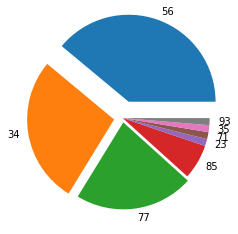

In [ ]:
plt.pie(df_fulfilment.region_code.value_counts(),labels=temp,explode=explode)
plt.show()

<h4> Region code: [56,34,77] has many fulfilment centers than anyother Regions</h4>

In [ ]:
df_fulfilment.center_type.value_counts()

TYPE_A    43
TYPE_C    19
TYPE_B    15
Name: center_type, dtype: int64

<h4> We have 3 types of fulfilment centers</h4>
<ol>
<li>TYPE_A</li>
<li>TYPE_B</li>
<li>TYPE_C</li>
</ol>

<BarContainer object of 3 artists>

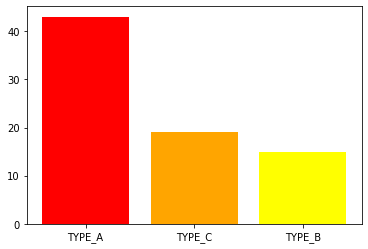

In [ ]:
plt.bar(["TYPE_A","TYPE_C","TYPE_B"],df_fulfilment.center_type.value_counts(),color = ["red","orange","yellow"])

In [ ]:
df_fulfilment[df_fulfilment["op_area"]==max(df_fulfilment["op_area"])]

,center_id,city_code,region_code,center_type,op_area
44,67,638,56,TYPE_B,7.0
45,174,700,56,TYPE_A,7.0
76,51,638,56,TYPE_A,7.0


<h4> Center_id: [51,67,174] has the highest operational area of 7 units than any other fulfiment center. The interesting fact is <i><b>they all belong to same region</i></b> </h4>

In [ ]:
df_fulfilment.groupby("center_type")["op_area"].max()

center_type
TYPE_A    7.0
TYPE_B    7.0
TYPE_C    5.1
Name: op_area, dtype: float64

<h4> The max operational area of each center type </h4>

<h2> Analyzing meal_info.csv </h2>

In [ ]:
df_meal = pd.read_csv("meal_info.csv")
df_meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


<h3> Columns: </h3>
<ol>
<li>meal_id</li>
<li>category</li>
<li>cuisine</li>

In [ ]:
df_meal.shape

(51, 3)

<h4> We have 51 different types of meal </h4>

In [ ]:
df_meal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   meal_id   51 non-null     int64 
 1   category  51 non-null     object
 2   cuisine   51 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


<h4> No null values in any of the columns </h4>
<h4> Inference:<br>
       Although meal_id is considerd as integers but it is actually categorical variable.

In [ ]:
df_meal.category.value_counts()

Beverages       12
Extras           3
Soup             3
Other Snacks     3
Salad            3
Rice Bowl        3
Starters         3
Sandwich         3
Pasta            3
Desert           3
Biryani          3
Pizza            3
Fish             3
Seafood          3
Name: category, dtype: int64

<BarContainer object of 5 artists>

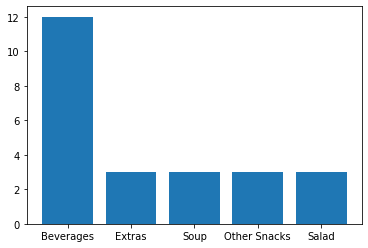

In [ ]:
plt.bar(df_meal.category.value_counts().index[:5],df_meal.category.value_counts()[:5])

<h4> we have more beverage options than any other meal. Another interesting fact is that except Beverages other food category have only 3 different meals. </h4> <h5> Considering this fact, Maybe many customer orders beverage so the company has started offering wider options,<h5>

In [ ]:
df_meal.cuisine.value_counts()

Thai           15
Indian         12
Italian        12
Continental    12
Name: cuisine, dtype: int64

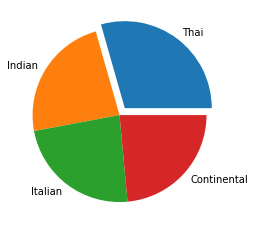

In [ ]:
plt.pie(df_meal.cuisine.value_counts(),labels = df_meal.cuisine.value_counts().index,explode=[0.1,0,0,0])
plt.show()

<h4> We primarily have Thai, Indian,Italian,Continental cuisines. Almost all cuisines have same amount of meal options. Although Thai has more options maybe the area is populated by Thai and Thai natives or even many people may prefer Thai food </h4>


<h2> Analyzing train.csv </h2>

In [ ]:
df_train = pd.read_csv("train.csv")
df_train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [ ]:
df_train.shape

(456548, 9)

<h4> We have record of 486548 orders </h4>
<h4> Columns:
<ol>
<li>id of the customer/order id </li>
<li>week </li>
<li>Center_id</li>
<li> meal_id</li>
<li>checkout_price </li>
<li>base price </li>
<li> emailer for promotion </li>
<li>homepage features </li>
<li> num of orders </li>

In [ ]:
df_train["id"].value_counts()

1379560    1
1201644    1
1199804    1
1321877    1
1320898    1
          ..
1037219    1
1320366    1
1114006    1
1240955    1
1361984    1
Name: id, Length: 456548, dtype: int64

<h4> Considering unique values of id this must be order id not the customer id </h4>

In [ ]:
temp = []
for i in df_train.center_id.value_counts()[:5]:
  temp.append(i)

In [ ]:
df_train.center_id.value_counts()

13     7046
10     7015
52     6993
43     6970
67     6915
       ... 
139    4627
57     4501
162    4366
41     4083
91     3432
Name: center_id, Length: 77, dtype: int64

<BarContainer object of 5 artists>

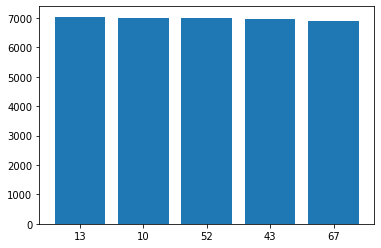

In [ ]:
plt.bar(["13","10","52","43","67"],temp)

<h4> Almost all the centers receive huge orders especially center id [13,10,52,43,67]

<h3> Mergin meal and train dataframes </h3>

In [ ]:
df_train = df_train.merge(df_meal,on="meal_id")

In [ ]:
df_train.cuisine.value_counts()

Italian        122925
Thai           118216
Indian         112612
Continental    102795
Name: cuisine, dtype: int64

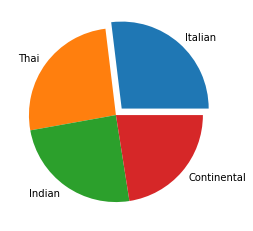

In [ ]:
plt.pie(df_train.cuisine.value_counts(),labels=df_train.cuisine.value_counts().index,explode = [0.1,0,0,0])
plt.show()

<h4> Majority of the customers order italian food. Ans also almost all the cuisines are ordered equally </h4>

In [ ]:
df_train.category.value_counts()

Beverages       127890
Rice Bowl        33408
Sandwich         33291
Pizza            33138
Starters         29941
Other Snacks     29379
Desert           29294
Salad            28559
Pasta            27694
Seafood          26916
Biryani          20614
Extras           13562
Soup             12675
Fish             10187
Name: category, dtype: int64

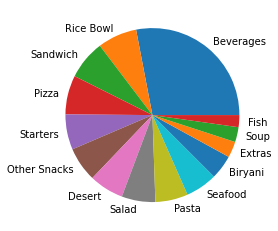

In [ ]:
plt.pie(df_train.category.value_counts(),labels=df_train.category.value_counts().index)
plt.show()

<h4> Majority of the customers has ordered Beverage </h4>

In [ ]:
df_train[df_train.num_orders==max(df_train.num_orders)]

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine
128263,1452474,5,43,2290,159.08,311.43,1,1,24299,Rice Bowl,Indian


<b><h4> On week 5: The Indian rice bowl has been ordered by more than 24000 people. Also there has been a heavy discount for the order. Considering this, There must have been any indian festival or occasion happend. To celebrate it they might have ordered.

In [ ]:
df_train[df_train.checkout_price==df_train.base_price]

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine
1,1040403,1,24,1885,136.83,136.83,0,0,1498,Beverages,Thai
2,1103215,1,11,1885,136.83,136.83,0,0,959,Beverages,Thai
6,1472084,1,109,1885,134.86,134.86,0,0,890,Beverages,Thai
8,1297434,1,93,1885,116.46,116.46,0,0,580,Beverages,Thai
13,1321689,1,89,1885,134.86,134.86,0,0,933,Beverages,Thai
...,...,...,...,...,...,...,...,...,...,...,...
456529,1435099,145,81,2104,583.03,583.03,0,0,122,Fish,Continental
456533,1059257,145,53,2104,640.23,640.23,0,0,27,Fish,Continental
456539,1329342,145,58,2104,583.03,583.03,0,0,15,Fish,Continental
456542,1377271,145,43,2104,639.23,639.23,0,0,15,Fish,Continental


In [ ]:
print(round((df_train.shape[0] - df_train[df_train.checkout_price==df_train.base_price].shape[0])*100/df_train.shape[0],3))

75.74


<h4> Almost 76% percentage of the customers has received some sort of dicounts </h4>

In [ ]:
df_train.emailer_for_promotion.value_counts()

0    419498
1     37050
Name: emailer_for_promotion, dtype: int64

([<matplotlib.patches.Wedge at 0x7f7a5f923610>,
 [Text(-1.0644440262326078, 0.2774146986331389, 'No'),
  Text(1.0644440067525265, -0.2774147733784697, 'Yes')])

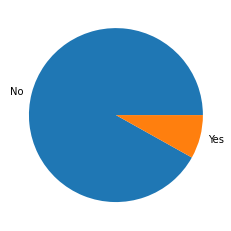

In [ ]:
plt.pie(df_train.emailer_for_promotion.value_counts(),labels=["No","Yes"])

<h4> Very few people has been responded for the promotions by email and has successfully ordered </h4>

In [ ]:
df_train[(df_train.emailer_for_promotion==0) & (df_train.homepage_featured==1)].shape

(30624, 11)

<h4> 30,624 people has successfully ordered through featured by homepage and not by email promotions </h4>

In [ ]:
df_train[df_train.base_price==max(df_train.base_price)]

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine
281658,1213267,135,93,1445,866.27,866.27,0,0,94,Seafood,Continental
282051,1350293,142,93,1445,727.53,866.27,0,0,53,Seafood,Continental
282107,1071316,143,93,1445,583.03,866.27,0,1,40,Seafood,Continental


<h4> Seafood is the expensive food that the company offers. Hardly any customers orders the product. Interestingly, all the 3 orders was shipped from center id 93 </h4>

<h3> Plot between weeks and num of orders </h3>

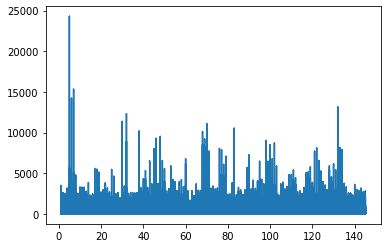

In [ ]:
plt.plot(df_train.week,df_train.num_orders)
plt.show()

<h2> Predicting the num of orders for given week <h2>

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
models_centerwise = {}
for i in df_train.center_id:
  models_centerwise[i] = 0

In [ ]:
for i in models_centerwise:
  X = np.array(df_train[df_train.center_id==i]["week"]).reshape(-1,1)
  Y = np.array(df_train[df_train.center_id==i]["num_orders"]).reshape(-1,1)
  lm = LinearRegression()
  lm.fit(X,Y)
  models_centerwise[i] = lm


<h2> Using Test Data to find predicted num of orders </h2>

In [ ]:
df_test = pd.read_csv("test.csv")
df_test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [ ]:
df_test.shape

(32573, 8)

In [ ]:
#predicted num of orders
temp = []
for i in range(len(df_test)):
  lm = models_centerwise[df_test.iloc[i]["center_id"]]
  temp.append(round(lm.predict(np.array(df_test.iloc[i]["week"]).reshape(-1,1))[0][0]))

In [ ]:
df_test["num_orders"] = temp

In [ ]:
df_test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1028232,146,55,1885,158.11,159.11,0,0,144
1,1127204,146,55,1993,160.11,159.11,0,0,144
2,1212707,146,55,2539,157.14,159.14,0,0,144
3,1082698,146,55,2631,162.02,162.02,0,0,144
4,1400926,146,55,1248,163.93,163.93,0,0,144


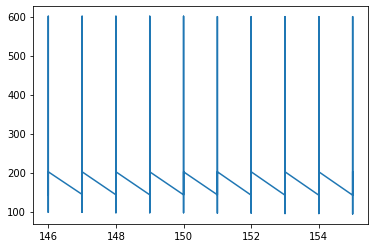

In [ ]:
#Forecasted plot of num of orders
plt.plot(df_test.week,df_test.num_orders)